In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline

### SIR and its Extensions
##### Modeling covid spread in India
reference : https://towardsdatascience.com/infectious-disease-modelling-part-i-understanding-sir-28d60e29fdfc

###### Total Population
(from worldometer)

In [2]:
N = 1377566886 

###### Initial Number of Infected and recovered
(as of april 1st)

In [3]:
I0, R0, E0, D0 = 1837, 169, 5000, 53
# Everyone else, S0, is susceptible to infection initially.
S0 = (N - I0 - R0) 

###### Beta Parameter 
The number of people an infected person infects per day. 

In [4]:
beta = 1.5 * (1/5) # r0 * (incubation period)
beta

0.30000000000000004

###### Gamma parameter
Reciprocal of number of days an infected person spreads the disease

In [5]:
gamma = (1.0 / 5)

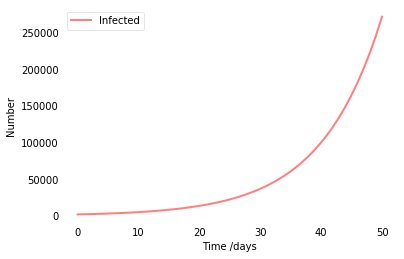

39218.062849904694


In [6]:
# A grid of time points (in days)
t = np.linspace(0, 50, 50)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, axisbelow=True)
ax.get_yaxis().get_major_formatter().set_scientific(False)
# ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I, 'r', alpha=0.5, lw=2, label='Infected')
# ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number ')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()
print(I[30])

In [7]:
def plot_infected(t, I) :
    fig = plt.figure(facecolor='w')
    ax = fig.add_subplot(111, axisbelow=True)
    ax.get_yaxis().get_major_formatter().set_scientific(False)
    # ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
    ax.plot(t, I, 'r', alpha=0.5, lw=2, label='Infected')
    # ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
    ax.set_xlabel('Time /days')
    ax.set_ylabel('Number ')
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
    plt.show()

###### Delta - exposed incubation period
Where a person is infected but doesnt spread the disease

In [8]:
delta = 1.0 / 3.0

###### Alpha - dearth rate

In [9]:
alpha = 0.03 # very low in India
rho = 1.0/15.0

In [10]:
def deriv(y, t, N, beta, gamma, delta):
    S, E, I, R = y
    dSdt = -beta * S * I / N
    dEdt = beta * S * I / N - delta * E
    dIdt = delta * E - gamma * I
    dRdt = gamma * I
    return dSdt, dEdt, dIdt, dRdt

In [11]:

t = np.linspace(0, 100, 100) # Grid of time points (in days)
y0 = S0, E0, I0, R0 # Initial conditions vector

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma, delta))
S, E, I, R = ret.T

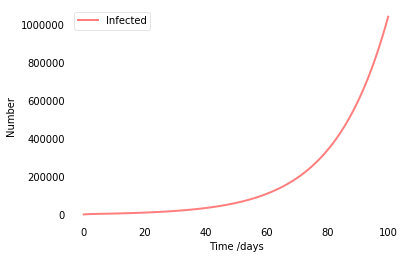

20431.329067693343

In [12]:
plot_infected(t, I)
I[30]

In [13]:
def deriv(y, t, N, beta, gamma, delta, alpha, rho):
    S, E, I, R, D = y
    dSdt = -beta(t) * S * I / N
    dEdt = beta(t) * S * I / N - delta * E
    dIdt = delta * E - (1 - alpha) * gamma * I - alpha * rho * I
    dRdt = (1 - alpha) * gamma * I
    dDdt = alpha * rho * I
    return dSdt, dEdt, dIdt, dRdt, dDdt

In [14]:
def r0(t) :
    if t < 10 :   return 2.00
    elif t < 20 : return 1.50
    elif t < 30 : return 1.30
    else : return 1.2 # This has to be modeled somehow

In [15]:
def beta(t) :
    return r0(t) * gamma

In [22]:
t = np.linspace(0, 500, 500) # Grid of time points (in days)
y0 = S0, E0, I0, R0, D0 # Initial conditions vector

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma, delta, alpha, rho))
S, E, I, R, D = ret.T

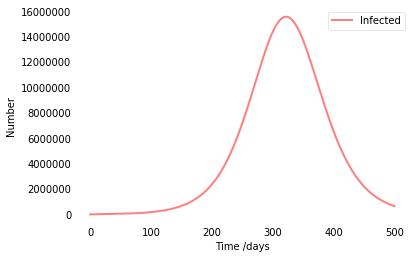

28385.04558687734

In [23]:
plot_infected(t, I)
I[30]